# Week 6 notebook
> unsupervised learning, clustering

- toc: true 
- badges: true
- comments: true
- categories: [machine-learning, workshop]


In [3]:
import numpy as np
from matplotlib import pyplot as plt

Overview: 
 - Supervised vs unsupervised. Meta-picture still holds. What is "generalisation"? 
 - Mind map. Clustering. EM. KMeans. Hierarchical. Normal mixture. 

# Question 1 & 2

In [1]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k = 2
init_seed = [1, 2]

# Question 3 

3) Using the 1-dimensional dataset {1, 2.7, 3.3, 4.6, 6.0, 7.5, 9.1, 10.8, 12.6, 16.5}, agglomerative hierarchical clustering and Euclidean distance, show the dendrogram for each of single linkage, average linkage and complete linkage criteria!

[[1], [2.7], [3.3], [4.6], [6.0], [7.5], [9.1], [10.8], [12.6], [16.5]]


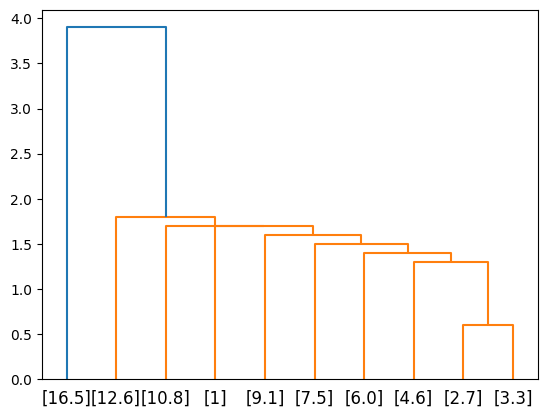

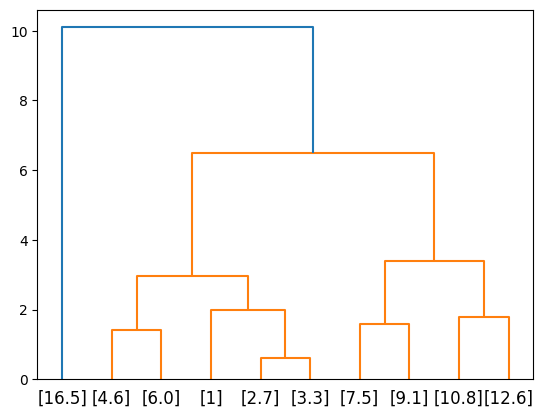

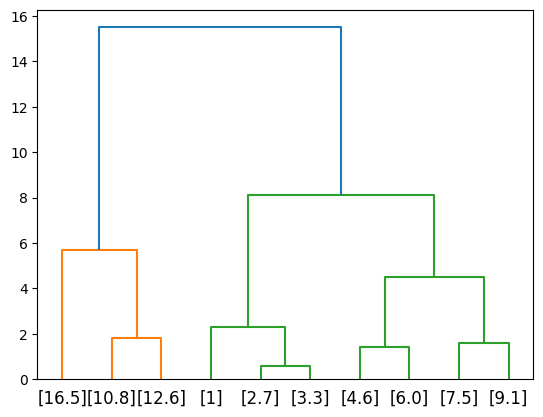

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform


inputs=[[1],[2.7],[3.3],[4.6],[6.0],[7.5],[9.1],[10.8],[12.6],[16.5]]
print(inputs)

d = pdist(inputs, 'euclidean')
#d = squareform(pdist(inputs, 'euclidean'))

hc1 = linkage(d, 'single')
dendrogram(hc1, labels=inputs)
plt.show()

hc2 = linkage(d, 'average')
dendrogram(hc2, labels=inputs)
plt.show()

hc3 = linkage(d, 'complete')
dendrogram(hc3, labels=inputs)
plt.show()

# Question 4 & 5
Link to written note: 

# Question 6
Actually check things in code: SSE monotonically decrease with `k`. 


# Question 7
Code illustration. 

Use Fisher’s famous Iris dataset. 
 - It contains 3 classes (species), 150 instances, and 4 numeric attributes.
 
 
 - Take the Iris data set and subset the ﬁrst four columns i.e., discard the 5th column containing the species classiﬁcation)


 - Read the scikit-learn documentation for k-means; Use k-means to cluster the unlabelled data into three clusters and extract cluster assignments.
 

# Question 8

# Practical

In [3]:
import pandas as pd
from sklearn.cluster import KMeans

irisall = pd.read_csv('./Workshop-materials-2022/iris.csv')
iris=irisall[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]

kmeans = KMeans(n_clusters=3, random_state=0).fit(iris)
labels=kmeans.labels_

# concatenating predicted labels to our dataset
iris_label = irisall.join(pd.DataFrame({'km_labels':labels}))

# What is the related label to each species
print('Predicted labels for setosa')
print(iris_label.loc[iris_label.Species=='setosa', 'km_labels'].value_counts())
print("")
#Setosa is matched with 1

print('Predicted labels for versicolor')
print(iris_label.loc[iris_label.Species=='versicolor', 'km_labels'].value_counts())
print("")
#versicolor is matched with 0


print('Predicted labels for virginica')
print(iris_label.loc[iris_label.Species=='virginica', 'km_labels'].value_counts())
print("")
#virginica is matched with 2


# matches in each iris type
TP_setosa = iris_label[(iris_label.Species=='setosa') & (iris_label.km_labels==1)].shape[0]
TP_versicolor = iris_label[(iris_label.Species=='versicolor') & (iris_label.km_labels==0)].shape[0]
TP_virginica = iris_label[(iris_label.Species=='virginica') & (iris_label.km_labels==2)].shape[0]

# total matches
matches = TP_setosa + TP_versicolor + TP_virginica
        
print("Total number of matches between cluster label and class label=",matches)
# iris size is 150

Predicted labels for setosa
1    50
Name: km_labels, dtype: int64

Predicted labels for versicolor
0    48
2     2
Name: km_labels, dtype: int64

Predicted labels for virginica
2    36
0    14
Name: km_labels, dtype: int64

Total number of matches between cluster label and class label= 134


#### Plot the ﬁrst two columns and colour by the assigned clusters. Are the cluster assignments well separated? 

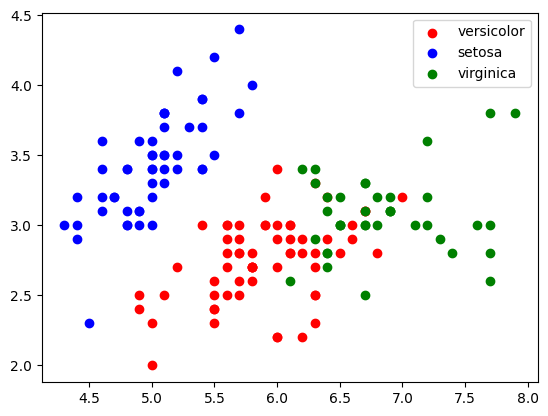

In [4]:
import matplotlib.pyplot as plt


unique_labels = list(set(labels))

colors = ['red','blue','green']
IrisName = ['versicolor','setosa', 'virginica']


for l in unique_labels:
    
    xi = iris_label.loc[iris_label['km_labels']==l,'Sepal.Length']
    yi = iris_label.loc[iris_label['km_labels']==l,'Sepal.Width']
    
    plt.scatter(xi, yi, c=colors[l], label=IrisName[l])
    
plt.legend()

plt.show()

##### Plot columns 3 and 4 coloured by cluster. Are these cluster assignments well separated?
Does the clustering coincide with the species? Why would this be the case?


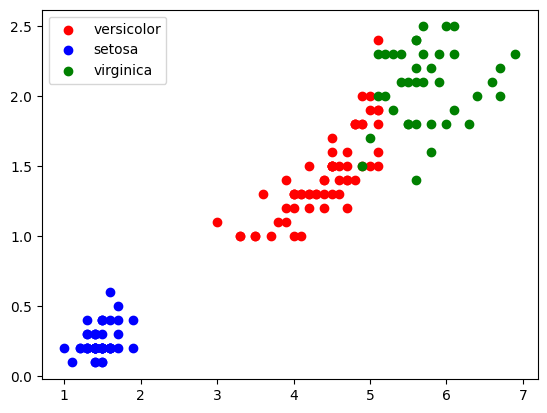

In [5]:
import matplotlib.pyplot as plt


unique_labels = list(set(labels))

colors = ['red','blue','green']
IrisName = ['versicolor','setosa', 'virginica']

for l in unique_labels:
    
    xi = iris_label.loc[iris_label['km_labels']==l,'Petal.Length']
    yi = iris_label.loc[iris_label['km_labels']==l,'Petal.Width']
    
    plt.scatter(xi, yi, c=colors[l], label=IrisName[l])
    
plt.legend()
plt.show()


### Colored based on Actual class label

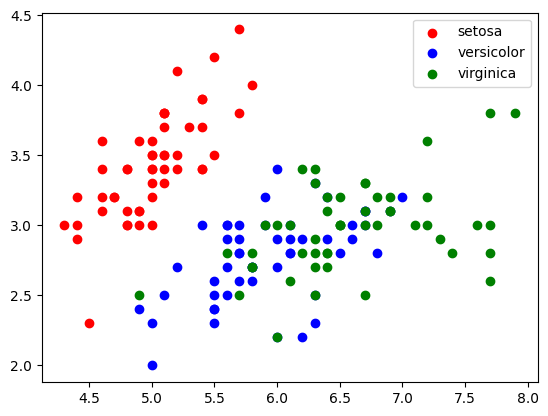

In [6]:
import matplotlib.pyplot as plt


unique_labels = iris_label.Species.unique()

colors = ['red','blue','green']
i=0
for l in unique_labels:
    
    xi = iris_label.loc[iris_label['Species']==l,'Sepal.Length']
    yi = iris_label.loc[iris_label['Species']==l,'Sepal.Width']
    
    plt.scatter(xi, yi, c=colors[i], label=l)
    i=i+1
    
plt.legend()

plt.show()

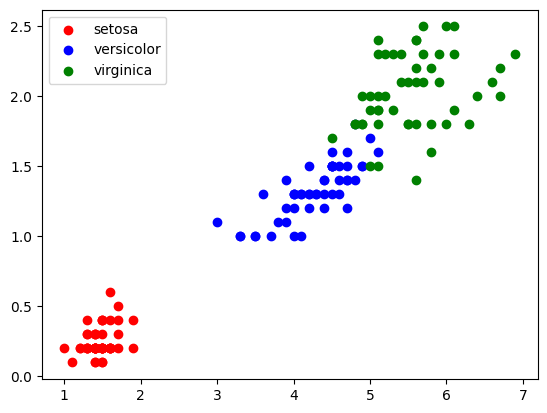

In [7]:
import matplotlib.pyplot as plt


unique_labels = iris_label.Species.unique()

colors = ['red','blue','green']
i=0
for l in unique_labels:
    
    xi = iris_label.loc[iris_label['Species']==l,'Petal.Length']
    yi = iris_label.loc[iris_label['Species']==l,'Petal.Width']
    
    plt.scatter(xi, yi, c=colors[i], label=l)
    i=i+1
    
plt.legend()

plt.show()